In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
%matplotlib inline

In [2]:
contrib_df = pd.read_table('P00000001-ALL.csv', skiprows=0, index_col=None, sep=',' , usecols=[2,4,5,6,7,8,9,10]).reset_index(drop=True)

/usr/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
contrib_df.head() 

,cand_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt
0,"Rubio, Marco",APO,AE,9096,RETIRED,RETIRED,100.0,18-JAN-16
1,"Rubio, Marco",APO,AE,9096,RETIRED,RETIRED,220.5,15-JAN-16
2,"Rubio, Marco",APO,AE,90120060,GOVERNMENT,ATTORNEY,500.0,09-FEB-16
3,"Rubio, Marco",APO,AE,90120096,GOVERNMENT,PILOT,500.0,09-FEB-16
4,"Rubio, Marco",APO,AE,90120096,GOVERNMENT,PILOT,500.0,09-FEB-16


In [4]:
# remove all refunded transactions
contrib_df = contrib_df[contrib_df.contb_receipt_amt > 0]

In [5]:
# format date column
contrib_df.contb_receipt_dt = pd.to_datetime(contrib_df.contb_receipt_dt, format='%d-%b-%y')

In [6]:
# extract last name of canditate only
contrib_df.cand_nm = contrib_df.cand_nm.str.extract('(\w+),')

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


In [7]:
tot_contrib = contrib_df.groupby('cand_nm')['contb_receipt_amt'].sum()

In [8]:
# how much each candidate got for each day 
#contrib_df.groupby(['cand_nm', 'contb_receipt_dt']).sum()['contb_receipt_amt']

http://www.realclearpolitics.com/epolls/2016/president/democratic_delegate_count.html, http://www.realclearpolitics.com/epolls/2016/president/republican_delegate_count.html

In [9]:
results_dem = pd.read_table('democratic.txt',sep='\t')
results_dem.head()

,State,Date,Delegates,Clinton,Sanders,Delegate Allocation,Open/Closed
0,Iowa,February 1,44 (8),23,21,Caucus,Semi-open
1,New Hampshire,February 9,24 (8),9,15,Primary,Semi-closed
2,Nevada,February 20,35 (8),20,15,Caucus,Closed
3,South Carolina,February 27,53 (6),39,14,Primary,Open
4,Alabama,March 1,53 (7),44,9,Primary,Open


In [10]:
results_dem.Date = pd.to_datetime(results_dem.Date + ' 2016', format='%B %d %Y', errors='coerce')

In [11]:
results_rep = pd.read_table('republican.txt',sep='\t')

In [12]:
results_rep.Date = pd.to_datetime(results_rep.Date + ' 2016', format='%B %d %Y', errors='coerce')

In [13]:
results_rep.head()

,State,Date,Delegates,Trump,Cruz,Rubio,Kasich,Primary/Caucus,Delegate Allocation,Open/Closed
0,Iowa,2016-02-01,30,7.0,8.0,7.0,1.0,Caucus,Proportional,Closed
1,New Hampshire,2016-02-09,23,11.0,3.0,2.0,4.0,Primary,Proportional*,Open**
2,South Carolina,2016-02-20,50,50.0,0.0,0.0,0.0,Primary,Winner Take All∇,Open
3,Nevada,2016-02-23,30,14.0,6.0,7.0,1.0,Caucus,Proportional,Closed
4,Alabama,2016-03-01,50,36.0,13.0,1.0,0.0,Primary,Proportional*#∇,Open


In [14]:
tot_del = pd.concat([results_rep[['Trump', 'Cruz', 'Rubio', 'Kasich']].sum(axis=0)
          , results_dem[['Clinton','Sanders']].sum(axis=0)])

In [15]:
scatter_df = pd.merge(pd.DataFrame(tot_contrib), pd.DataFrame(tot_del), left_index=True, right_index=True, how='outer').fillna(0)

In [16]:
scatter_df.columns = ['Contributions', 'Delegates']

There are a large group of candidates who did not receive any delegates. [look up who dropped out before the first primary]
But it looks like there is a linear trend. [calculate r here].

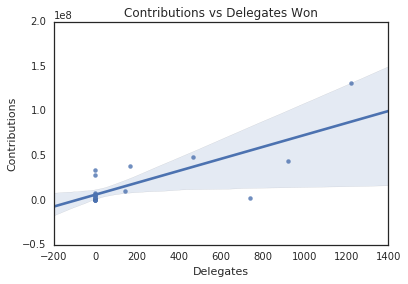

In [25]:
sns.regplot('Delegates','Contributions', data=scatter_df)
plt.title('Contributions vs Delegates Won')

In [23]:
# other things to explore:
# fundraising rate vs delegate rate